<h4>Lily Grumbach
    <br>M1 Humanités numériques - Université PSL</h4>
<h1><center>Rendu TAIS-TAL </center></h1>
<h2><center>Partie TAIS</center></h2>
<h3><center>2/3 : Désambiguisation des lieux</center></h3>

<b><u>PLAN:</u></b>
1) Harmonisation des données Géopolitiques pour le fond de carte de 1914
<br>
    
<h4>2) Reconstruire et adapter la base de l'IREL aux données à disposition</h4>
<br/>
    
3) Géoréférencer les données trouvées

<b>Stratégie en place :  </b>

Nous avons 3 sources possibles de désambiguisation : 
* Les liens wikidata indiqués par le medialab 
* La base de données de l'IREL, l'inventaire en ligne des Archives nationales d'Outre Mer
* Geonames  => id= lgrumbach

Nous procèderons dans l'ordre cité pour fournir la meilleure désambiguisation possible.

Source :https://stackoverflow.com/questions/44049679/geojson-to-shapefile-using-python 

In [ ]:
# from googletrans import Translator
# translator = Translator()
# translator.translate("oui","en")


In [1]:
#module
from desambiguisation import nettoyage_df_IREL,ListEntities2df,urlencode,Extract_longlat_IREL,Extract_longlat_WikiData

#Généraux
import pandas as pd
import re
import numpy as np

#Webscrapping
from bs4 import BeautifulSoup
import geocoder
from lxml import html
import requests

#Wikidata 
import qwikidata

# 0. Les df de référence

**AHMC**

In [2]:
##AHMC
df_AHMC_annote = pd.read_csv('./df_annotes/dfAHMCannotations.csv')

#Ne conserver qu'une partie du df
df_AHMC_annote = df_AHMC_annote[["article_titre","revue_annee","GPE_ents","LOC_ents","ORG_ents"]]

#Extraire les entités GPE,LOC,ORG
liste_GPEAHMC = ListEntities2df(df_AHMC_annote,"AHMC","GPE_ents")
liste_LOCAHMC = ListEntities2df(df_AHMC_annote,"AHMC","LOC_ents")
liste_ORGAHMC = ListEntities2df(df_AHMC_annote,"AHMC","ORG_ents")

fichier créé dans ./desambiguisation/Revue_ParEntityLabel/AHMC/AHMCGPE_ents.csv
Output:liste des entités GPE_ents 

fichier créé dans ./desambiguisation/Revue_ParEntityLabel/AHMC/AHMCLOC_ents.csv
Output:liste des entités LOC_ents 

fichier créé dans ./desambiguisation/Revue_ParEntityLabel/AHMC/AHMCORG_ents.csv
Output:liste des entités ORG_ents 



**AMN**

In [3]:
#AMN
df_AMN_annote = pd.read_csv('./df_annotes/dfAMNannotations.csv')

#Ne conserver qu'une partie du df
df_AMN_annote = df_AMN_annote[["article_titre","revue_annee","GPE_ents","LOC_ents","ORG_ents"]]

#Extraire les entités GPE,LOC,ORG
liste_GPEAMN = ListEntities2df(df_AMN_annote,"AMN","GPE_ents")
liste_LOCAMN = ListEntities2df(df_AMN_annote,"AMN","LOC_ents")
liste_ORGAMN = ListEntities2df(df_AMN_annote,"AMN","ORG_ents")

fichier créé dans ./desambiguisation/Revue_ParEntityLabel/AMN/AMNGPE_ents.csv
Output:liste des entités GPE_ents 

fichier créé dans ./desambiguisation/Revue_ParEntityLabel/AMN/AMNLOC_ents.csv
Output:liste des entités LOC_ents 

fichier créé dans ./desambiguisation/Revue_ParEntityLabel/AMN/AMNORG_ents.csv
Output:liste des entités ORG_ents 



# Etape2 : Faire une estimation des noms de lieux que je peux et ne peux pas retrouver grâce aux bases de données pré-désambiguisées que j'ai déjà
## Càd : GPH et IREL

In [4]:
#On réunit en une seule liste l'ensemble des noms de localité
list_GPELOC = liste_GPEAMN+liste_LOCAMN+liste_GPEAHMC+liste_LOCAHMC
# list_GPELOC

### Données GPH 

In [5]:
#import du df GPH entities avec lien wikidata
with open ("./GeoPolHist-202103/medialab-GeoPolHist-fb19b66/data/GeoPolHist_entities.csv") as f :
    df_wikiData = pd.read_csv(f)
df_wikiData.rename(columns={"GPH_name":"NAME"})

#Importer le df de référence
df_MANUEL = pd.read_csv("./output_finaux/df_1914manuelCarto.csv")

#Merge avec les données complétées manuellement 
df_WikiQGIS=pd.merge(df_wikiData,df_MANUEL,how="right",on="GPH_code")

#Export : 
df_WikiQGIS.to_csv("./WikiQGIS.csv")

### Nettoyer les données IREL

In [6]:
dico_IREL ={}
n=0

with open('./IREL/liste_lieux_IREL.js','r') as f:
    lignes = f.readlines()
    
    for l in lignes:
        l=l.split("\n")
        dico_IREL[n]=l
        n+=1
        
        
df_IREL = nettoyage_df_IREL(dico_IREL)

return: df_IREL nettoyé


### Faire lien avec les données wikidata de GPH

In [7]:
#GPH entities avec lien wikidata

df_wikiData = pd.read_csv("./GeoPolHist-202103/medialab-GeoPolHist-fb19b66/data/GeoPolHist_entities.csv")
    
df_wikiData=df_wikiData.rename(columns={"GPH_name":"NAME"})

df_wikiData

,GPH_code,NAME,continent,wikidata,wikidata_alt1,wikidata_alt2,wikidata_alt3,notes
0,2,United States of America,America,http://www.wikidata.org/entity/Q30,NaN,NaN,NaN,NaN
1,3,Alaska,America,http://www.wikidata.org/entity/Q797,NaN,NaN,NaN,NaN
2,4,Hawaii,America,http://www.wikidata.org/entity/Q782,NaN,NaN,NaN,NaN
3,5,Virgin Islands,America,http://www.wikidata.org/entity/Q11703,NaN,NaN,NaN,NaN
4,6,Puerto Rico,America,http://www.wikidata.org/entity/Q1183,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1223,9994,Ross Dependency,Oceania,http://www.wikidata.org/entity/Q203073,NaN,NaN,NaN,NaN
1224,9998,Concessions in China,World,https://www.wikidata.org/wiki/Q1376651,NaN,NaN,NaN,NaN
1225,9999,Inter-Allied Commission of Control,World,https://www.wikidata.org/wiki/Q1665892,NaN,NaN,NaN,NaN
1226,0,League of Nations,World,https://www.wikidata.org/wiki/Q38130,NaN,NaN,NaN,NaN


In [18]:
df_wikiData["wikidata"].astype(str)

0           http://www.wikidata.org/entity/Q30
1          http://www.wikidata.org/entity/Q797
2          http://www.wikidata.org/entity/Q782
3        http://www.wikidata.org/entity/Q11703
4         http://www.wikidata.org/entity/Q1183
                         ...                  
1223    http://www.wikidata.org/entity/Q203073
1224    https://www.wikidata.org/wiki/Q1376651
1225    https://www.wikidata.org/wiki/Q1665892
1226      https://www.wikidata.org/wiki/Q38130
1227       https://www.wikidata.org/wiki/Q1065
Name: wikidata, Length: 1228, dtype: object

Attribuer à chaque GPH_code les coordonnées associées  pour ensuite merge

Nous avions commencé par attribuer les coordonnées pour l'ensembledes 

In [10]:
# possible mais très long à executer :
#df_longlatGPH = Extract_longlat_WikiData(List_Q_code)

Pour ne conserver que les données qui nous intéressent, on le merge avec la base de données finale de la Partie 1

In [11]:
df_IREL=df_IREL.rename(columns={"Lieu-dit":"NAME"})
df_WikiIREL = pd.merge(df_wikiData,df_IREL,how="inner",on="NAME")

#Attention : je drop les duplicatas sur les GPH_code pour avoir une idée plus géographique qu'historique:
df_WikiIREL["GPH_code"]=df_WikiIREL["GPH_code"].drop_duplicates(keep="first")

#Ici onsouhaite avoirleurnombredans l'absolu,regardless of the GPH Status
df_WikiIREL=df_WikiIREL.loc[df_WikiIREL["GPH_code"].notnull()]

<AxesSubplot:title={'center':'Proportion des lieux par continent présents sur IREL ET dans la bdd GPHE'}>

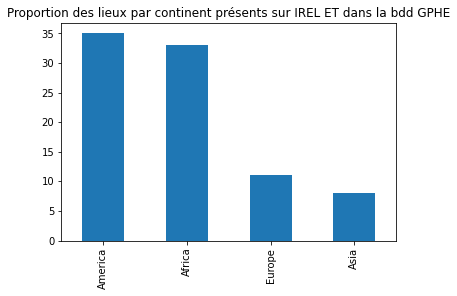

In [12]:
#Un plot pour avoir une idée des entités par continent que l'on trouve dans les deux 

df_WikiIREL["continent"].value_counts().plot.bar(title='Proportion des lieux par continent présents sur IREL ET dans la bdd GPHE')

In [27]:
pattern = r"(Q\d+)"
df_WikiQGIS["Q_code"] = df_WikiQGIS["wikidata"].str.extract(pattern)
List_Q_code =df_WikiQGIS["Q_code"].tolist()

for code in List_Q_code:
    if type(code) is None:
        print(code)

In [14]:
df_longlatGPH = Extract_longlat_WikiData(List_Q_code)

In [ ]:


# Extract_longlat_WikiData(List_Qcode)

# ORGANISATION IREL : 

In [ ]:
df_IREL

## reconstituer les URL de IREL:

In [ ]:
#encoder les titres
list_titre_encoded =[]
for titre in df_IREL["titre"]:
    titre_encoded=urlencode(titre)
    list_titre_encoded.append(titre_encoded)

df_IREL["titre_encoded"] = list_titre_encoded

#reconstituer l'URL
list_url=[]
for encoded in df_IREL["titre_encoded"]:
    IREL_url= "http://anom.archivesnationales.culture.gouv.fr/geo.php?ir=&lieu="+encoded
    list_url.append(IREL_url)
    
df_IREL["IREL_url"] = list_url

#Chercher les coordonnées de chaque entrée:
#Beautiful Soup
pattern_coord_lat = r"\"value\"\:\{\"latitude\"\:(-?[\d]{1,2}\.[\d]*)\,"
pattern_coord_long = r"longitude\"\:(-?[\d]{1,3}\.[\d]*)\,"





Par économie de mémoire et de temps, à l'issue de la récupération des URL nous les avons exporté dans un csv trouvable ici : "./output_finaux/ListeCoordonnees.csv"

In [ ]:
### LISTE des coordonnées récupérée et exportée dans "./output_finaux/ListeCoordonnees.csv"

# liste_coords=[]
# for url in df_IREL["IREL_url"]: 
#     coords = desambiguisation.Extract_longlat_IREL(url)
#     liste_coords.append(coords)
# df_IREL["Coordonnees"]=liste_coords
# df_IREL["Coordonnees"].to_csv("./output_finaux/ListeCoordonnees.csv",sep='\t',index=False)


In [ ]:
df_IREL["Coordonnees"]=pd.read_csv("./output_finaux/ListeCoordonnees.csv",sep='\t')
df_IREL["Coordonnees"]

In [ ]:


print("nombre de coordonnées manquantes : ",df_IREL["Coordonnees"].isna().sum())

df_IREL.loc[df_IREL["Coordonnees"].isna()]["titre"].sample(n=30)

#5805 noms de lieux sans coordonnées géographiques. 
#Il faudrait pour cela revoir les url constitués pour voir s'ils fonctionnent bien
##Le problème tient notamment à des problèmes de ponctuation, d'espace et d'appostrophe
##Question à régler plus tard pour avoir à l'avenir une bdd pertinente et réutilisable par toutes et tous 

In [ ]:
df_IREL["Coordonnees"]

## Nettoyage des colonnes Aministration et Lieu-dit du df IREL 

Les deux colonnes en questions nous permettront de déterminer si oui ou non le lieu est géolocalisé dans la base de donnée IREL

In [ ]:
df_IREL=desambiguisation.IREL_Nettoyage_AdminLieuDit(df_IREL)

In [ ]:
#On récupère tous les noms de lieu: 
liste_colnames= ['Administration', 'Lieu-dit','Administration_bis',
       'Lieu-dit_bis']

liste_entites_clean=[]
for colname in liste_colnames:
    liste_entites_clean+=df_IREL[colname].to_list()
    
while None in liste_entites_clean:
        liste_entites_clean.remove(None)

liste_entites_clean

#Avoir une liste avec 1seule occurence de nom de lieu :
IREL_listeclean = pd.DataFrame(liste_entites_clean).rename(columns={0:"entites"})
IREL_listeclean = IREL_listeclean.groupby(by="entites").sum().index.values.tolist()

In [ ]:
# IREL_listeclean

In [ ]:
IREL_listeclean2=[]
for placeName in IREL_listeclean:
    
    if re.search(r" $",placeName):
        placeName=placeName.replace(re.search(r" $",placeName).group(0),"")    

    if re.search(r"^ ",placeName):
        placeName=placeName.replace(re.search(r"^ ",placeName).group(0),"")
    
    IREL_listeclean2.append(placeName)
# IREL_listeclean2

# Chercher quels noms de lieux de la liste de mon df se trouve dans celle des IREL  

In [ ]:
L_MatchDF_IREL, L_NotMatchDF_IREL =desambiguisation.MatchGPELOC_IREL(list_GPELOC,IREL_listeclean2)

#### EXPLORATION DES DEUX LISTES POUR COMPRENDRE CE QUI N'EST PAS PASSE 

In [ ]:
from desambiguisation import EgaliserTaille_MatchNot_IREL,nettoyage_desambiguisation,MatchGPELOC_IREL

In [ ]:
# #pour que les deux listes aient la même longueur:
# lengthDiff=len(L_NotMatchDF_IREL)-len(L_MatchDF_IREL)
# L_MatchDF_IREL += list(np.empty(shape = (lengthDiff)))

L_MatchDF_IREL,L_NotMatchDF_IREL=EgaliserTaille_MatchNot_IREL(L_MatchDF_IREL,L_NotMatchDF_IREL)

comparaison_matchIREL = pd.DataFrame({'L_MatchDF_IREL' : L_MatchDF_IREL,
                                'L_NotMatchDF_IREL' : L_NotMatchDF_IREL},
                                columns=['L_MatchDF_IREL','L_NotMatchDF_IREL'])
#Pour exploration manuelle
comparaison_matchIREL.to_csv("./check_comparaisonMatchIREL.csv")

In [ ]:
#dictionnaire pour la désambiguisation :
Dico_desambiguisation = {"Guinée Française":["Guinée française"],
                         "Côte d'Ivoire":["côte d'Ivoire"],
                         "Pak-Hoi":["Pak-Hoï","Pakhoï"],
                         "Chengdu":['Tchen-Tou','Tchentou'],
                         "Yunnan":['Yun-Nam','Yun-Nan','Yunnam'],
                         "Hanoi":["Hanoï"],
                         "Laokay":["Lao-kay"],
                         "Côte d\'Ivoire":["Côte d'Ivoire","côte d'Ivoire"]
                        }
Liste_FP = ["Annamite","Annamites","île","Croyance","Port"]

#Problemes:
#Guinée trop flou pour être assigné à "Guinée française" car à la même époque existait
# une Guinée allemande et une britannique...

In [ ]:
#Nettoyage en fonction de la désambiguisation 
liste_GPELOC = nettoyage_desambiguisation(Dico_desambiguisation,list_GPELOC)


In [ ]:
L_MatchDF_IREL2, L_NotMatchDF_IREL2 = MatchGPELOC_IREL(list_GPELOC,IREL_listeclean2)

In [ ]:
#pour que les deux listes aient la même longueur:
lengthDiff=abs(len(L_NotMatchDF_IREL2)-len(L_MatchDF_IREL2))

if len(L_NotMatchDF_IREL2) > len(L_MatchDF_IREL2):
    L_MatchDF_IREL2 += list(np.empty(shape = (lengthDiff)))
    print("nouvelle taille L_Match_IREL2",len(L_Match_IREL2))
    
elif len(L_NotMatchDF_IREL2) < len(L_MatchDF_IREL2):
    L_NotMatchDF_IREL2 += list(np.empty(shape = (lengthDiff)))
    print("nouvelle taille L_NotMatch_IREL2",len(L_NotMatchDF_IREL2))

else:
    pass


In [ ]:
print("Différence de taillent entre les deux listes : ",lengthDiff)
print("taille de L_NotMatchDF_IREL2 : ",len(L_NotMatchDF_IREL2))
print("taille de L_MatchDF_IREL2 : ",len(L_MatchDF_IREL2))

comparaison_matchIREL = pd.DataFrame({'L_MatchDF_IREL' : L_MatchDF_IREL2,
                                'L_NotMatchDF_IREL' : L_NotMatchDF_IREL2},
                                columns=['L_MatchDF_IREL','L_NotMatchDF_IREL'])
#Pour exploration manuelle
comparaison_matchIREL.to_csv("./check_comparaisonMatchIREL.csv")

<h3>Pour les entités trouvées : les associer aux df AHMC et AMN</h3>

In [ ]:
comparaison_matchIREL.to_csv("./desambiguisation/comparaison_match_IREL.csv")

In [ ]:
comparaison_matchIREL

#### Maintenant on cherche à extraire de ` df_IREL ` les coordonnées des lieux qui ont matché 

In [ ]:
df_ensemble = pd.DataFrame()
for placeName in L_MatchDF_IREL2:
    df_placeName=df_IREL.loc[df_IREL["titre"].str.contains(placeName)]
    df_placeName["placeName"]=placeName
    df_ensemble=pd.concat([df_ensemble,df_placeName])
   

In [ ]:
# df_ensemble["placeName"]=df_ensemble["placeName"].drop_duplicates(keep="first")
df_ensemble_byPlaceName = df_ensemble.groupby(by="placeName").sum()

In [ ]:
# df_ensemble_byPlaceName=df_ensemble_byPlaceName.drop(columns=["titre_encoded","Administration_bis","Lieu-dit_bis"])
df_ensemble_byPlaceName.to_csv("./desambiguisation/IREL_parlieuxreconnus.csv")

#Nécessité de nettoyer IREL_url des localisations multiples. Nous n'en avons pas besoin car il nous suffit d'avoir un point en sont sein 
# df_ensemble_byPlaceName["IREL_url"].str.

In [ ]:
df_ensemble_byPlaceName

In [ ]:
df_byPlaceName_freq = df_ensemble.groupby(by="placeName").count().IREL_url
df_byPlaceName_freq.sort_values(ascending=False).head(30)

In [ ]:
df_byPlaceName_freq.loc[df_byPlaceName_freq<3000].plot()

# Geonames 
source: https://www.geonames.org/export/web-services.html

username= lgrumbach

In [ ]:
URL="Chine"

Geonames_url_base ="http://api.geonames.org/postalCodeLookupJSON?placename="+URL+"&username=lgrumbach"
Geonames_url_base

In [ ]:
URL = urlencode("Abala, Subdivision (République du Congo)")
url_base

# Etape 3 : trouver les coordonnées Wikidata GPH
## LISTE DES PROPERTIES :  https://www.wikidata.org/wiki/Wikidata:Database_reports/List_of_properties/all 

## European Colonialism :https://www.wikidata.org/wiki/Wikidata:WikiProject_European_Colonialism

## list of colonial empires:https://www.wikidata.org/wiki/Wikidata:WikiProject_European_Colonialism/list_of_colonial_empires

REssource pour seformer à SPARQL sur Wikidata : 
https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial#SPARQL_basics


Ce dont j'ai besoin:
SELCT ?coord
WHERE
{
#?coord has coord QID
    ?coord wd:QID
}


Items= wd: /// properties = wdt:.  
=> wdt AVANT wd

* ";" = AND
* "." = fin d'une requête
* "," = pour ajouter un item aux mêmes propriétés
* "[]" = Recherche relative.  Inside the brackets, you can specify predicate-object pairs, just like after a ;
* "p" : points not to the object, but to a statement node.
    *  This node then is the subject of other triples: 
        * ps: (for property statement) points to the statement object,
        * pq: (property qualifier) to qualifiers, 
        * prov:wasDerivedFrom points to reference nodes (which we’ll ignore for now).


AJouter : 
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]". }
=> Sert à afficher le label associé à l'entité recherchée

**Instances and classes**

"has" // "is" 
[objet particulier] IS [concept/subclass] 
=> différencier concept et subclass -> essayer de remplacer "is" par "is a kind of". SI ça marche, c'est une subclass. Sinon un concept. 
ex: Gone with the wind "is a kind of" film =>  marche pas => film est un concept


**Property paths**


wdt:P31/wdt:P279/wdt:P279 
P31 = nature de l'el
P279 =sous-classede [eltavant]

wdt:
* **P31** = nature del'élt
* **P625** = coordonnées géo
* **P17**	= country
* **P530**	diplomatic relation
* rdfs:label "Mary Wollstonecraft"@en;
* **P945** =	allegiance	country (or other power) that the person or organization serves
* **P1376**	capital of	country, state, department, canton or other administrative division of which the municipality is the governmental seat
* **P8119**	HASC	codes to represent country subdivisions
* **Q133156** colony 
* **Q161243** dependent territory

=> pour éviter de listertoutes lessubclass, on peut écrire "*" ou "+" comme enregex

**Qualifiers**




**Globe oordinates**

Coordinate text values have value type globecoordinate and property type globe-coordinate.

The simple value of the coordinate is the WKT string with the coordinates, with type geo:wktLiteral, e.g.: "Point(35.3 12.93)"^^geo:wktLiteral. The order of the coordinates in WKT is longitude, latitude (since format version 0.0.2).

The full value has latitude, longitude and precision as double, and the globe as IRI.


**Wikibase Entity Id** 

Wikibase Entity Id values have value type wikibase-entityid and property type wikibase-item.


In [ ]:
## Faire lien avec les données wikidata de GPH

### Extraire les entity ID de chaque lien wikidata

In [ ]:
def wikidata_extractID(df,ncol):

    ListEntityID = []
    for i in range (len(df)):
        wikiurl = df.iloc[i,ncol]
    #     print(type(wikiurl))
        if type(wikiurl) is float:
            ListEntityID.append(wikiurl)
        else:
            entityID = re.search(r'[A-Z][0-9]+$',wikiurl).group(0)
            ListEntityID.append(entityID)
    return ListEntityID

In [ ]:
#wikidata
wikiURL1 = wikidata_extractID(df_WikiQGIS,3)
df_WikiQGIS["entityID_1"]=wikiURL1

#wikidata_alt1
wikiURLalt1 = wikidata_extractID(df_WikiQGIS,4)
df_WikiQGIS["entityID_alt1"]=wikiURLalt1

#wikidata_alt2
wikiURLalt2 = wikidata_extractID(df_WikiQGIS,5)
df_WikiQGIS["entityID_alt2"]=wikiURLalt2

#NB: il n'y a pas de wikidata_alt3 pour la période concernée
df_WikiQGIS.iloc[2,14]
df_WikiQGIS

In [ ]:
df_WikiQGIS

### Recherche des coordonnées via l'API wikidata

In [ ]:
#Essai Beautiful Soup
pattern_coord_lat = r"\"value\"\:\{\"latitude\"\:(-?[\d]{1,2}\.[\d]*)\,"
pattern_coord_long = r"longitude\"\:(-?[\d]{1,3}\.[\d]*)\,"

def Extract_longlat (url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, features="lxml")
    div_ens_tag = soup.find_all("div", {"class":"tableau1"})
    
    lattitude = re.search(pattern_coord_lat,r.text).group(1)
    longitude = re.search(pattern_coord_long,r.text).group(1)
    return (lattitude,longitude)

In [ ]:
list_long=[]
list_lat=[]
list_nan = []
for i in range (len(df_WikiQGIS)):
    url = df_WikiQGIS.iloc[i,3]
    if type(url) is float:
            list_nan.append(url)
    else:
        Extract_longlat(url)
    

### QUERY iD

Properties used: 
instance of (P31)  
View with Reasonator View with SQID, subclass of (P279)  
View with Reasonator View with SQID, coordinate location (P625)  
View with Reasonator View with SQID, area (P2046)  
View with Reasonator View with SQID

Countries : 

?country wdt:P31 wd:Q3624078 . # sovereign state
    ?article schema:about ?country .

In [ ]:
# ESSAI 1 : qwikidata
# pip install qwikidata
from qwikidata.entity import WikidataItem
from qwikidata.linked_data_interface import get_entity_dict_from_api
from qwikidata.sparql import (get_subclasses_of_item,
                              return_sparql_query_results)

Q_ID = "Q889"
subclasses_of_entity = get_subclasses_of_item(Q_ID)
subclasses_of_entity

In [ ]:
# pip install pywikibot

In [ ]:
 pip install "mwparserfromhell>=0.5.0"

In [ ]:
# Essai 2 : pywikibot 
# pip install "mwparserfromhell>=0.5.0"
import pywikibot
import mwparserfromhell
import pwb
# pywikibot.login()

usernames['wikidata']['en'] = 'LilyGENC'

site = pywikibot.Site("en","wikidata")
repo = site.data_repository()
item = pywikibot.ItemPage(repo, "Q889")
item_dict = item.get() 

# 2. IREL 

http://anom.archivesnationales.culture.gouv.fr/geo.php?ir=

In [ ]:
df_IREL.to_csv("./IREL/irel_essai.csv")
df_

Reconstitution des URL IREL

In [ ]:
## UTF8 encode => URL


In [ ]:
model_urlIREL="http://anom.archivesnationales.culture.gouv.fr/geo.php?ir=&lieu="

In [ ]:
"Aboisso+Como%C3%A9+%28C%C3%B4te+d%27Ivoire%29"
df_IREL.iloc[4,5].strip(r"\"\'\''\,\;")

In [ ]:
df_IREL["Localité"][df_IREL["Localité"]=="Zuytpeene"].index.values

In [ ]:
def getIndexes(dfObj, value):
      
    # Empty list
    listOfPos = []
      
    # isin() method will return a dataframe with 
    # boolean values, True at the positions    
    # where element exists
    result = dfObj.isin([value])
      
    # any() method will return 
    # a boolean series
    seriesObj = result.any()
  
    # Get list of column names where 
    # element exists
    columnNames = list(seriesObj[seriesObj == True].index)
     
    # Iterate over the list of columns and
    # extract the row index where element exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
  
        for row in rows:
            listOfPos.append((row, col))
              
    # This list contains a list tuples with 
    # the index of element in the dataframe
    return listOfPos

In [ ]:
# Calling getIndexes() function to get 
# the index positions of all occurrences
# of 22 in the dataframe
listOfPositions = getIndexes(df_IREL, "Zuytpeene")
  
print('Index positions of 22 in Dataframe : ')
  
# Printing the position
for i in range(len(listOfPositions)):
    print(listOfPositions[i])